<h4> Import Packages </h4>

In [6]:
import numpy as np
import tensorflow as tf
import keras
import scipy.misc as sm
import cv2
import h5py
import matplotlib.pyplot as plt
import time
import keras.backend as K
import os.path
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.layers.convolutional import Convolution2D
from keras import losses
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing import image
from keras.models import load_model


Using TensorFlow backend.


<h4> Create Memory Map To Import Training Data </h4>

In [3]:
original_X = np.memmap('./original_X.dat', dtype = np.float32, mode = 'r+', shape = (22424, 224, 224, 3))
original_Y = np.memmap('./original_Y.dat', dtype = np.float32, mode = 'r+', shape = (22424, 1))

<h4> Read CSV File For Image List </h4>

In [4]:
csvList = np.genfromtxt('./imageList.csv', delimiter = ',', dtype = str)

<h4> Read Images Into Memory Map </h4>
<p> (Images Are Normalised And Downsized While Being Read) </p>

In [9]:
def readImages():
    
    for i in range (22424):
        imagePath = "./train/" + csvList[i][0] + "/" + csvList[i][1]
        inputImage = sm.imread(imagePath)
        inputImageResized = sm.imresize(inputImage, (224, 224))
        
        # Normalise values to between 0 ans 1
        original_X[i] = inputImageResized / 255
        original_Y[i] = csvList[i][0][1]
        
        if (i % 50 == 0):
            print ("Images Read : ", i)

In [77]:
start = time.time()
readImages()
stop = time.time()
print ("22424 Images Read in ", stop - start, " Seconds.")

<h4> Convert Y To One Hot Encoded Form </h4>


In [29]:
def computeOneHot(labels, depth):
    
    c = tf.constant(depth, name = "depth")
    
    # Compute One Hot Encoding
    oneHot = tf.one_hot(labels, c, axis = 0)
    
    # Run Tensor Flow Session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        oneHotMatrix = sess.run(oneHot)
        sess.close()
    
    return oneHotMatrix

<h4> Data About Data</h4>

In [6]:
# Compute One Hot Encoding Of Y
oneHot_Y = computeOneHot(original_Y, 10)
oneHot_Y = oneHot_Y.reshape(10, 22424).T

print ("Shape Of X : ", original_X.shape)
print ("Shape Of Y : ", oneHot_Y.shape)
print ("\nNumber Of Images : ", original_X.shape[0])
print ("Size Of Each Image : ", original_X.shape[1], "x", original_X.shape[2], "x", original_X.shape[3])
print ("\nNumber Of Images : ", original_X.shape[0])
print ("Number Of Classes : ", oneHot_Y.shape[1])

print ("\nNumber Of Examples In Each Class : ")


# Initialise Class Counts
c0, c1, c2, c3, c4, c5, c6, c7, c8, c9 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

for i in range (22424):
    
    if original_Y[i] == 0:
        c0 = c0 + 1
    if original_Y[i] == 1:
        c1 = c1 + 1
    if original_Y[i] == 2:
        c2 = c2 + 1
    if original_Y[i] == 3:
        c3 = c3 + 1
    if original_Y[i] == 4:
        c4 = c4 + 1
    if original_Y[i] == 5:
        c5 = c5 + 1
    if original_Y[i] == 6:
        c6 = c6 + 1
    if original_Y[i] == 7:
        c7 = c7 + 1
    if original_Y[i] == 8:
        c8 = c8 + 1
    if original_Y[i] == 9:
        c9 = c9 + 1
        
print (c0, c1, c2, c3, c4, c5, c6, c7, c8, c9)

Shape Of X :  (22424, 224, 224, 3)
Shape Of Y :  (22424, 10)

Number Of Images :  22424
Size Of Each Image :  224 x 224 x 3

Number Of Images :  22424
Number Of Classes :  10

Number Of Examples In Each Class : 
2489 2267 2317 2346 2326 2312 2325 2002 1911 2129


<h4> Visualise The Data Set </h4>

Category :   7
Image :  img_59228.jpg


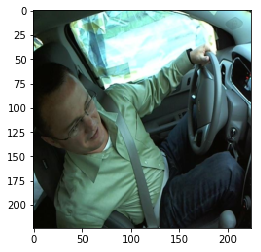

Y Label :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [7]:
i = 16032
print ("Category :  ", csvList[i][0][1])
print ("Image : ", csvList[i][1])
plt.imshow(original_X[i])
plt.show()
print ("Y Label : ", oneHot_Y[i, :])


<h4> Import Test Images </h4>

In [16]:
test_X = np.memmap('./test_X.dat', dtype = np.float32, mode = 'r+', shape = (79727, 224, 224, 3))
test_X_Image_Names = np.memmap('./test_X_Image_Names.dat', dtype = object, mode = 'w+', shape = (79727, 1))

In [17]:
def readTestImages():
    
    j = 0
    
    for i in range (102150):
        imageTestPath = "./test/img_" + str(i) + ".jpg"
        
        if os.path.isfile(imageTestPath):
            #inputImage = sm.imread(imageTestPath)
            #inputImageResized = sm.imresize(inputImage, (224, 224))
            test_X_Image_Names[j] = "img_" + str(i) + ".jpg"
            
            # Normalise values to between 0 ans 1
            #test_X[j] = inputImageResized / 255
            j = j + 1
            
            if (j % 1000 == 0):
                print ("Images Read : ", j)

In [18]:
start = time.time()
readTestImages()
stop = time.time()
print ("79727 Images Read in ", stop - start, " Seconds.")

Images Read :  1000
Images Read :  2000
Images Read :  3000
Images Read :  4000
Images Read :  5000
Images Read :  6000
Images Read :  7000
Images Read :  8000
Images Read :  9000
Images Read :  10000
Images Read :  11000
Images Read :  12000
Images Read :  13000
Images Read :  14000
Images Read :  15000
Images Read :  16000
Images Read :  17000
Images Read :  18000
Images Read :  19000
Images Read :  20000
Images Read :  21000
Images Read :  22000
Images Read :  23000
Images Read :  24000
Images Read :  25000
Images Read :  26000
Images Read :  27000
Images Read :  28000
Images Read :  29000
Images Read :  30000
Images Read :  31000
Images Read :  32000
Images Read :  33000
Images Read :  34000
Images Read :  35000
Images Read :  36000
Images Read :  37000
Images Read :  38000
Images Read :  39000
Images Read :  40000
Images Read :  41000
Images Read :  42000
Images Read :  43000
Images Read :  44000
Images Read :  45000
Images Read :  46000
Images Read :  47000
Images Read :  48000
I

<h1> 1. Basic Convolutional Neural Network Using Keras </h1>

In [9]:
def basicCNNModel (inputShape):
    
    # Input 
    X_Input = Input(inputShape)
    
    # Zero Pad
    X = ZeroPadding2D((3, 3))(X_Input)
    
    # Convolution Layer 1
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
    X = Activation('relu')(X)
    
    # MaxPool Layer 1
    X = MaxPooling2D((2, 2))(X)
    
    # Convolution Layer 2
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv1')(X)
    X = Activation('relu')(X)
    
    # MaxPool Layer 2
    X = MaxPooling2D((2, 2))(X)
    
    # Convolution Layer 3
    X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv2')(X)
    X = Activation('relu')(X)
    
    # MaxPool Layer 3
    X = MaxPooling2D((2, 2))(X)
    
    # Flatten X
    X = Flatten()(X)
    
    # Fully Connected Layer 1
    X = Dense(64, activation = 'relu', name = 'fc0')(X)
    
    # Drop Out Layer 4
    X = Dropout(0.3)(X)
    
    # Fully Connected Layer 1
    X = Dense(10, activation = 'softmax', name = 'fc1')(X)
    
    # Model
    model = Model(inputs = X_Input, outputs = X, name = 'BasicCNN')
    
    return model

<h4> Define A Data Generator To Augment Data </h4>

In [10]:
trainDataGen = ImageDataGenerator (rotation_range = 15,
                              width_shift_range = 0.1, 
                              height_shift_range = 0.2, 
                              zoom_range = 0.0, 
                              fill_mode = 'nearest')

<h4> Visualise Augmented Data </h4>
<p> (Augmented Data Is Stored On Disk Upon Running The Code Below) </p>

In [32]:
i = 0
for batch in trainDataGen.flow(original_X[10:15], batch_size = 1, save_to_dir = 'Augmented', save_prefix = 'Aug', save_format = 'jpeg'):
    i = i + 1
    if i == 10:
        break

<h4> Create A Train Generator </h4> 

In [11]:
# Augment Imported Data

trainGenerator = trainDataGen.flow(original_X, oneHot_Y, batch_size = 32)

<h4> Get The Model </h4>

In [12]:
# Get The Model
model = basicCNNModel((original_X.shape[1], original_X.shape[2], original_X.shape[3]))

# Compile The Model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

<h4> Train </h4>

In [2]:
# model.fit(x = original_X, y = oneHot_Y, epochs = 3, batch_size = 32)
model.fit_generator(trainGenerator, steps_per_epoch = 22424 // 32, epochs = 2)

<h4> Save / Load Weights For Later Use </h4>

In [14]:
# Save Weights
model.save_weights('BasicCNNEpochTwo.h5')

In [15]:
# Load Weights If Needed
model.load_weights('BasicCNNEpochOne2.h5')

<h4> Save The Entire Model </h4>

In [184]:
# Save The Model
model.save('./BasicCNN.h5')

<h4> Predict On The Train Set Images</h4>

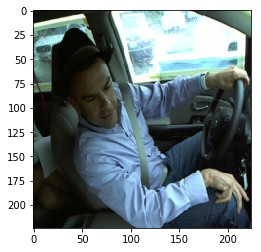

True Label :  9
Predicted :  9


In [16]:
# Predict On Train Set 
i = 7969
imTrainPath = "./train/" + csvList[i][0] + "/" + csvList[i][1]

trainImage = sm.imread(imTrainPath)
trainImage = sm.imresize(trainImage, (224, 224))
trainImage = trainImage / 255
trainImage = trainImage.astype(np.float32)

plt.imshow(trainImage)
plt.show()

trainImage = np.expand_dims(trainImage, axis = 0)

print ("True Label : ", int(original_Y[i]))
print("Predicted : ", np.argmax(model.predict(trainImage)))

<h4> Predict On The Test Set Images </h4>

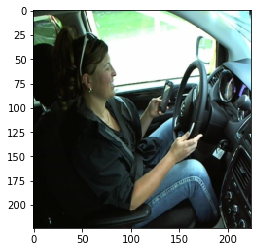

Predicted :  3


In [17]:
# Predict On Test Set 
i = 1345
imTestPath = "./test/img_" + str(i) + ".jpg"
testImage = sm.imread(imTestPath)
testImage = sm.imresize(testImage, (224, 224))
testImage = testImage / 255
testImage = testImage.astype(np.float32)

plt.imshow(testImage)
plt.show()

testImage = np.expand_dims(testImage, axis = 0)

print("Predicted : ", np.argmax(model.predict(testImage)))


<h4> Calculate Accuracy On Train Set (Optional) </h4>

In [33]:
pred = model.evaluate (original_X, oneHot_Y)
print ("Train Set Accuracy")
print ("Loss = " + str(pred[0]))
print ("Train Accuracy = " + str(pred[1]))

22424/22424 [==============================] - 1165s 52ms/step
Train Set Accuracy
Loss = 0.18387321003057802
Train Accuracy = 0.9419372101320014


<h4> Kaggle Submission Format For The Basic CNN Model </h4>

In [19]:
submissionCSV = np.zeros((79727, 11), dtype = object)

In [15]:
def generateKaggleCSV ():
    
    for i in range (79727):

        imName = test_X_Image_Names[i][0]
        predVal =  (model.predict(np.expand_dims(test_X[i], axis = 0)))

        submissionCSV[i, 0] = str(imName)
        submissionCSV[i, 1:] = predVal

        if i % 100 == 0:
            print ("Test Images Predicted : ", i)

In [30]:
start = time.time()
generateKaggleCSV()
stop = time.time()
print ("79727 Images Predicted in ", stop - start, " Seconds.")
np.savetxt("submission.csv", submissionCSV, delimiter = ',', fmt = '%10s')

Test Images Predicted :  0
Test Images Predicted :  100
Test Images Predicted :  200
Test Images Predicted :  300
Test Images Predicted :  400
Test Images Predicted :  500
Test Images Predicted :  600
Test Images Predicted :  700
Test Images Predicted :  800
Test Images Predicted :  900
Test Images Predicted :  1000
Test Images Predicted :  1100
Test Images Predicted :  1200
Test Images Predicted :  1300
Test Images Predicted :  1400
Test Images Predicted :  1500
Test Images Predicted :  1600
Test Images Predicted :  1700
Test Images Predicted :  1800
Test Images Predicted :  1900
Test Images Predicted :  2000
Test Images Predicted :  2100
Test Images Predicted :  2200
Test Images Predicted :  2300
Test Images Predicted :  2400
Test Images Predicted :  2500
Test Images Predicted :  2600
Test Images Predicted :  2700
Test Images Predicted :  2800
Test Images Predicted :  2900
Test Images Predicted :  3000
Test Images Predicted :  3100
Test Images Predicted :  3200
Test Images Predicted 

 <p> Some Testing Code </p>

# Some More CNN Architectures


<h2> 2. VGG - 16 Model (No Top) </h2>

In [4]:
def VGG_16():

    model = Sequential()
    
    # Convolution Block 1
    model.add(ZeroPadding2D((1,1),input_shape=(224, 224, 3)))
    model.add(Convolution2D(64, 3, 3, activation = 'relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation = 'relu'))
    model.add(MaxPooling2D((2,2), strides = (2,2)))

    # Convolution Block 2
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation = 'relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation = 'relu'))
    model.add(MaxPooling2D((2,2), strides = (2,2)))
    # Test Drop Out
    model.add(Dropout(0.4))

    # Convolution Block 3
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation = 'relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation = 'relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation = 'relu'))
    model.add(MaxPooling2D((2,2), strides =  (2,2)))
    # Test Drop Out
    model.add(Dropout(0.5))

    # Convolution Block 4
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation = 'relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation = 'relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation = 'relu'))
    model.add(MaxPooling2D((2,2), strides = (2,2)))
    # Test Drop Out
    model.add(Dropout(0.7))

    # Convolution Block 5
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation = 'relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation = 'relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation = 'relu'))
    model.add(MaxPooling2D((2,2), strides = (2,2)))
    model.add(Dropout(0.7))


    return model


In [5]:
# Get The Model
modelV = VGG_16()

<h4> Load Pre Trained Weights For The VGG - 16 Model </h4>

In [28]:
modelV.load_weights('./vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

<h4> Create New Fully Connected Layers For 10 Class Classification </h4>

In [6]:
topModel = Sequential()

# Flatten Output Of Last Layer In VGG 16 No Top
topModel.add(Flatten(input_shape = modelV.output_shape[1:]))

# Dense Layer 1
topModel.add(Dense(256))

# Batch Normalisation 1
topModel.add(BatchNormalization())

# Acticvation 1
topModel.add(Activation('relu'))

# Drop Out 1
topModel.add(Dropout(0.7))

# Dense Layer 2
topModel.add(Dense(256))

# Batch Normalisation 2
topModel.add(BatchNormalization())

# Acticvation 2
topModel.add(Activation('relu'))

# Drop Out 2
topModel.add(Dropout(0.7))

# Final Output Layer
topModel.add(Dense(10, activation = 'softmax'))

# Connect The Two Models
modelV.add(topModel)

# Set First 25 Layers Of VGG To Non Trainable
for layer in modelV.layers[:25]:
    layer.trainable = False

In [7]:
# Compile The Final Model With New Top Layers

# Create Optimiser Object
optimiser = keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# optimiser = keras.optimizers.Adadelta(lr = 0.00001, decay = 0.1)

modelV.compile(optimizer = optimiser, loss = 'categorical_crossentropy', metrics = ['accuracy'])


<h4> Get C0 and C9 Test Data To Add To Train Data </h4>
<p> First, lets find image names of all images which have been classified as c0 or c9 with high accuracy. </p>

In [2]:
testPredictions = np.genfromtxt('./bestVGGSubmission.csv', delimiter = ',', dtype = str)

In [26]:
# Numbewr Of C0 & C9

i = 0
for p in testPredictions:
    
    if float(p[1]) > 0.94:
        i = i + 1
        
j = 0
for p in testPredictions:
    
    if float(p[10]) > 0.95:
        j = j + 1
    
print ("C0 Images With Prediction Accuracy Greater Than  0.94 = ", i)
print ("C9 Images With Prediction Accuracy Greater Than  0.95 = ", j)

C0 Images With Prediction Accuracy Greater Than  0.9 =  1795
C9 Images With Prediction Accuracy Greater Than  0.9 =  1542


<h4> Lets Create Arrays To Hold The Names Of The New Test Images </h4> 

In [54]:
c0TestImages = np.zeros((1500, 1), dtype = object)
c9TestImages = np.zeros((1500, 1), dtype = object)

predTestImages = np.zeros((3000, 1), dtype = object)

In [55]:
i = 0

for p in testPredictions:
        
    if float(p[1]) > 0.94:
        c0TestImages[i] = str(p[0])
        i = i + 1
    
    if i == 1500:
        break
        
i = 0

for p in testPredictions:
        
    if float(p[10]) > 0.95:
        c9TestImages[i] = str(p[0])
        i = i + 1
    
    if i == 1500:
        break

<h4> Concatenate Names Of Both C0 and C9 Into One Array </h4>

In [56]:
predTestImages[:1500, :] = c0TestImages
predTestImages[1500:3000, :] = c9TestImages

<h4> Create Memory Maps To Hold The New Images </h4>

In [11]:
train_augment_X = np.memmap('./original_test_X.dat', dtype = np.float32, mode = 'r+', shape = (3000, 224, 224, 3))
train_augment_Y = np.memmap('./original_test_Y.dat', dtype = np.float32, mode = 'r+', shape = (3000, 1))

<h4> Read The New Images Into Memory Maps </h4>

In [12]:
def readTrainAugmentImages():
    
    for i in range (3000):
        imagePath = "./test/" + str(predTestImages[i][0])
        inputImage = sm.imread(imagePath)
        inputImageResized = sm.imresize(inputImage, (224, 224))
        
        # Normalise values to between 0 ans 1
        train_augment_X[i] = inputImageResized / 255
        
        if i <= 1500:
            train_augment_Y[i] = 0
        else:
            train_augment_Y[i] = 9
        
        if (i % 50 == 0):
            print ("Images Read : ", i)

In [3]:
readTrainAugmentImages()

<h4> Create New memory Maps To Hold The Final Train Set </h4> 

In [27]:
final_X = np.memmap('./final_X.dat', dtype = np.float32, mode = 'r+', shape = (25424, 224, 224, 3))
final_Y = np.memmap('./final_Y.dat', dtype = np.float32, mode = 'r+', shape = (25424, 1))

<h4> Concatenate Original Training Set And The 3000 Additional Images From The Test Set </h4>
<p> (The 3000 additinal images are at the top of the new array, with the old 22424 images follwing) </p>

In [13]:
start = time.time()

final_X[:3000, :,:,:] = train_augment_X
final_X[3000:, :, :, :] = original_X

final_Y[:3000] = train_augment_Y
final_Y[3000:] = original_Y

stop = time.time()

print ("Final Data Set Produced In ", (stop - start))


Final Data Set Produced In  467.53134083747864


<h4> Data About Data (Again) </h4>

In [30]:
# Compute One Hot Encoding Of Y
oneHot_Y_Augment = computeOneHot(final_Y, 10)
oneHot_Y_Augment = oneHot_Y_Augment.reshape(10, 25424).T

print ("Shape Of X : ", final_X.shape)
print ("Shape Of Y : ", oneHot_Y_Augment.shape)
print ("\nNumber Of Images : ", final_X.shape[0])
print ("Size Of Each Image : ", final_X.shape[1], "x", final_X.shape[2], "x", final_X.shape[3])
print ("\nNumber Of Images : ", final_X.shape[0])
print ("Number Of Classes : ", oneHot_Y_Augment.shape[1])

print ("\nNumber Of Examples In Each Class : ")


# Initialise Class Counts
c0, c1, c2, c3, c4, c5, c6, c7, c8, c9 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

for i in range (25424):
    
    if final_Y[i] == 0:
        c0 = c0 + 1
    if final_Y[i] == 1:
        c1 = c1 + 1
    if final_Y[i] == 2:
        c2 = c2 + 1
    if final_Y[i] == 3:
        c3 = c3 + 1
    if final_Y[i] == 4:
        c4 = c4 + 1
    if final_Y[i] == 5:
        c5 = c5 + 1
    if final_Y[i] == 6:
        c6 = c6 + 1
    if final_Y[i] == 7:
        c7 = c7 + 1
    if final_Y[i] == 8:
        c8 = c8 + 1
    if final_Y[i] == 9:
        c9 = c9 + 1
        
print (c0, c1, c2, c3, c4, c5, c6, c7, c8, c9)

Shape Of X :  (25424, 224, 224, 3)
Shape Of Y :  (25424, 10)

Number Of Images :  25424
Size Of Each Image :  224 x 224 x 3

Number Of Images :  25424
Number Of Classes :  10

Number Of Examples In Each Class : 
3990 2267 2317 2346 2326 2312 2325 2002 1911 3628


<h4> Let's Visualise The Data, Again. </h4>

Category :   [9.]


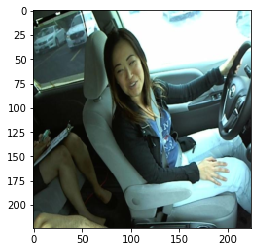

In [33]:
i = 1600
print ("Category :  ", final_Y[i])
# print ("Image : ", predTestImages[i])
plt.imshow(final_X[i])
plt.show()
# print ("Y Label : ", oneHot_Y[i, :])


<h4> Create Augmented Data Generators For The VGG Model </h4> 

In [34]:
trainVGGDataGen = ImageDataGenerator (rotation_range = 15,
                              width_shift_range = 0.1, 
                              height_shift_range = 0.2,
                              shear_range = 0.3,
                              zoom_range = 0.2, 
                              fill_mode = 'nearest')
validationVGGDataGen = ImageDataGenerator (rotation_range = 0,
                              width_shift_range = 0.0, 
                              height_shift_range = 0.0, 
                              zoom_range = 0.0, 
                              fill_mode = 'nearest')

trainVGGGenerator = trainVGGDataGen.flow(final_X[:23924, :, :, :], oneHot_Y_Augment[:23924, :], batch_size = 32)

validationVGGGenerator = validationVGGDataGen.flow(final_X[23924:, :, :, :], oneHot_Y_Augment[23924:, :], batch_size = 32)


<h4> Training Time! </h4> 
<p> (Best Weights Are Saved Automatically In The Callback Function) </p>

In [32]:
# Train
saveWeights  = keras.callbacks.ModelCheckpoint('./finalBestVGG16Weights.h5', monitor='val_loss', verbose = 0, save_best_only = True, save_weights_only = True, mode='auto', period=1)

history = modelV.fit_generator(trainVGGGenerator, 
                     steps_per_epoch = 23924 // 6, 
                     epochs = 5, 
                     validation_data = validationVGGGenerator,
                     validation_steps = 1500 // 32, 
                     callbacks = [saveWeights])

Epoch 1/5
3987/3987 [==============================] - 4323s 1s/step - loss: 3.0614 - acc: 0.1422 - val_loss: 1.9764 - val_acc: 0.2249
Epoch 2/5
3987/3987 [==============================] - 4285s 1s/step - loss: 2.2535 - acc: 0.2654 - val_loss: 1.7262 - val_acc: 0.4803
Epoch 3/5
3987/3987 [==============================] - 4239s 1s/step - loss: 1.7558 - acc: 0.3947 - val_loss: 1.4449 - val_acc: 0.6107
Epoch 4/5
3987/3987 [==============================] - 4224s 1s/step - loss: 1.3594 - acc: 0.5271 - val_loss: 1.1449 - val_acc: 0.7011
Epoch 5/5
3987/3987 [==============================] - 4258s 1s/step - loss: 0.9929 - acc: 0.6705 - val_loss: 0.7909 - val_acc: 0.8030


<p> More Training </p>

In [35]:
# Train For 5 More Epochs

saveWeights  = keras.callbacks.ModelCheckpoint('./final10BestVGG16Weights.h5', monitor='val_loss', verbose = 0, save_best_only = True, save_weights_only = True, mode='auto', period=1)

historyOne = modelV.fit_generator(trainVGGGenerator, 
                     steps_per_epoch = 23924 // 6, 
                     epochs = 5, 
                     validation_data = validationVGGGenerator,
                     validation_steps = 1500 // 32, 
                     callbacks = [saveWeights])

Epoch 1/5
3987/3987 [==============================] - 4243s 1s/step - loss: 0.7184 - acc: 0.7743 - val_loss: 0.6031 - val_acc: 0.8546
Epoch 2/5
3987/3987 [==============================] - 4246s 1s/step - loss: 0.5414 - acc: 0.8413 - val_loss: 0.5746 - val_acc: 0.8519
Epoch 3/5
3987/3987 [==============================] - 4235s 1s/step - loss: 0.4178 - acc: 0.8823 - val_loss: 0.6409 - val_acc: 0.8485
Epoch 4/5
3987/3987 [==============================] - 4236s 1s/step - loss: 0.3331 - acc: 0.9091 - val_loss: 0.7035 - val_acc: 0.8376
Epoch 5/5
3987/3987 [==============================] - 4360s 1s/step - loss: 0.2769 - acc: 0.9262 - val_loss: 0.6577 - val_acc: 0.8410


<p> Some More Training </p>

In [ ]:
saveWeights  = keras.callbacks.ModelCheckpoint('./final15BestVGG16Weights.h5', monitor='val_loss', verbose = 0, save_best_only = True, save_weights_only = True, mode='auto', period=1)

historyTwo = modelV.fit_generator(trainVGGGenerator, 
                     steps_per_epoch = 23924 // 6, 
                     epochs = 5, 
                     validation_data = validationVGGGenerator,
                     validation_steps = 1500 // 32, 
                     callbacks = [saveWeights])

Epoch 1/5
3987/3987 [==============================] - 4243s 1s/step - loss: 0.2304 - acc: 0.9399 - val_loss: 0.6294 - val_acc: 0.8410
Epoch 2/5
3987/3987 [==============================] - 4286s 1s/step - loss: 0.2012 - acc: 0.9474 - val_loss: 0.6656 - val_acc: 0.8512
Epoch 3/5
3987/3987 [==============================] - 4273s 1s/step - loss: 0.1765 - acc: 0.9549 - val_loss: 0.7511 - val_acc: 0.8410
Epoch 4/5
3987/3987 [==============================] - 4284s 1s/step - loss: 0.1544 - acc: 0.9603 - val_loss: 0.7046 - val_acc: 0.8417
Epoch 5/5
2370/3987 [================>.............] - ETA: 28:20 - loss: 0.1439 - acc: 0.9638

<p> Just A Little More Training </p>

In [36]:
saveWeights  = keras.callbacks.ModelCheckpoint('./final20BestVGG16Weights.h5', monitor='val_loss', verbose = 0, save_best_only = True, save_weights_only = True, mode='auto', period=1)

historyThree = modelV.fit_generator(trainVGGGenerator, 
                     steps_per_epoch = 23924 // 6, 
                     epochs = 5, 
                     validation_data = validationVGGGenerator,
                     validation_steps = 1500 // 32, 
                     callbacks = [saveWeights])

Epoch 1/5
3987/3987 [==============================] - 4430s 1s/step - loss: 0.1999 - acc: 0.9489 - val_loss: 0.6032 - val_acc: 0.8431
Epoch 2/5
3987/3987 [==============================] - 4366s 1s/step - loss: 0.1738 - acc: 0.9554 - val_loss: 0.6855 - val_acc: 0.8471
Epoch 3/5
3987/3987 [==============================] - 4310s 1s/step - loss: 0.1586 - acc: 0.9592 - val_loss: 0.5379 - val_acc: 0.8655
Epoch 4/5
3987/3987 [==============================] - 4305s 1s/step - loss: 0.1384 - acc: 0.9652 - val_loss: 0.6312 - val_acc: 0.8485
Epoch 5/5
3987/3987 [==============================] - 4564s 1s/step - loss: 0.1257 - acc: 0.9678 - val_loss: 0.5427 - val_acc: 0.8533


<p> And 20 Long Epochs Later...</p>
<h4> Join Data About Accuracy & Loss Across All 20 Epochs To Plot </h4>

In [5]:
dataAcc = np.zeros((15, 1))
dataValAcc = np.zeros((15, 1))
dataLoss = np.zeros((15, 1))
dataValLoss = np.zeros((15, 1))

dataAcc[:5, :] = np.array(history.history['acc']).reshape(15, 1)
dataAcc[5:10, :] = np.array(historyOne.history['acc']).reshape(15, 1)
dataAcc[10:15, :] = np.array(history.history['acc']).reshape(15, 1)

dataValAcc[:5, :] = np.array(history.history['val_acc']).reshape(15, 1)
dataValAcc[5:10, :] = np.array(historyOne.history['val_acc']).reshape(15, 1)
dataValAcc[10:15, :] = np.array(history.history['val_acc']).reshape(15, 1)

dataLoss[:5, :] = np.array(history.history['loss']).reshape(15, 1)
dataLoss[5:10, :] = np.array(historyOne.history['loss']).reshape(15, 1)
dataLoss[10:15, :] = np.array(history.history['loss']).reshape(15, 1)

dataValLoss[:5, :] = np.array(history.history['val_loss']).reshape(15, 1)
dataValLoss[5:10, :] = np.array(historyOne.history['val_loss']).reshape(15, 1)
dataValLoss[10:15, :] = np.array(history.history['val_loss']).reshape(15, 1)


<h4> Plot Data </h4> 

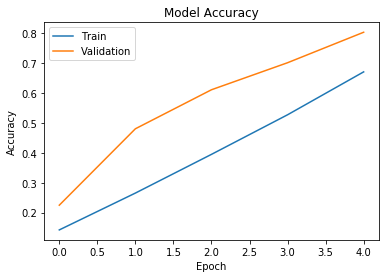

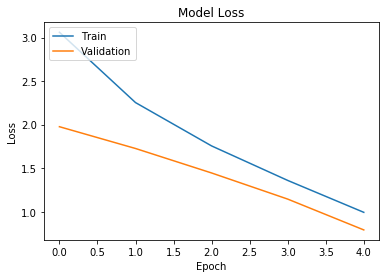

In [33]:
# Plot Accuracy

plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Loss

plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<h4> Load Weights To Predict For Kaggle </h4> 

In [35]:
modelV.load_weights('final15BestVGG16Weights.h5')

<h4> Generate Kaggle Submission For VGG Model </h4> 

In [20]:
def generateKaggleCSVVGG ():
    
    for i in range (79727):

        imName = test_X_Image_Names[i][0]
        predVal =  (modelV.predict(np.expand_dims(test_X[i], axis = 0)))

        submissionCSV[i, 0] = str(imName)
        submissionCSV[i, 1:] = predVal

        if i % 100 == 0:
            print ("Test Images Predicted : ", i)

<h4> Prediction Time! </h4> 

In [37]:
start = time.time()
generateKaggleCSVVGG()
stop = time.time()
print ("79727 Images Predicted in ", stop - start, " Seconds.")
np.savetxt("final20BestVGG16.csv", submissionCSV, delimiter = ',', fmt = '%10s')

Test Images Predicted :  0
Test Images Predicted :  100
Test Images Predicted :  200
Test Images Predicted :  300
Test Images Predicted :  400
Test Images Predicted :  500
Test Images Predicted :  600
Test Images Predicted :  700
Test Images Predicted :  800
Test Images Predicted :  900
Test Images Predicted :  1000
Test Images Predicted :  1100
Test Images Predicted :  1200
Test Images Predicted :  1300
Test Images Predicted :  1400
Test Images Predicted :  1500
Test Images Predicted :  1600
Test Images Predicted :  1700
Test Images Predicted :  1800
Test Images Predicted :  1900
Test Images Predicted :  2000
Test Images Predicted :  2100
Test Images Predicted :  2200
Test Images Predicted :  2300
Test Images Predicted :  2400
Test Images Predicted :  2500
Test Images Predicted :  2600
Test Images Predicted :  2700
Test Images Predicted :  2800
Test Images Predicted :  2900
Test Images Predicted :  3000
Test Images Predicted :  3100
Test Images Predicted :  3200
Test Images Predicted 

<h3> Our Kaggle Score So Far! </h3>
<p>The private leaderboard is calculated with approximately 69% of the test data. <br><br> The public leaderboard is calculated with approximately 31% of the test data. <br><br>The final results will be based on the 69%, so the final standings may be different.</p>

<h4> Our Scores </h4>
![Score](./Kaggle Score.jpg)

<h4> Since The Competition Has Ended, The Leaderboards Don't Reflect Our Scores, But Here's Where We Would Stand <br><br> Private Leaderboard : Rank 217 </h4>

![Private](./Private Rank.jpg)

<h4> Public Leaderboard : Rank 261 </h4>

![Public](./Public Rank.jpg)